In [1]:
import torch
import numpy as np
from torch import Tensor
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
import torch.optim as optim
%matplotlib inline

In [2]:
# first load the data
# reference: https://www.aiworkbox.com/lessons/load-mnist-dataset-from-pytorch-torchvision
# you will need to obtain different dataset in different ways. In this case,  
# I searched google for pytorch mnist dataset 
# sometimes you need to first download the dataset, it could be in binary, it could be in csv,
# then you read about how the data can be used, typically data provider will give some info on that
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [3]:
len(mnist_trainset), len(mnist_testset)

(60000, 10000)

In [4]:
# use .data and .targets to get the X and y
X_train = mnist_trainset.data
y_train = mnist_trainset.targets
X_test = mnist_testset.data
y_test = mnist_testset.targets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])


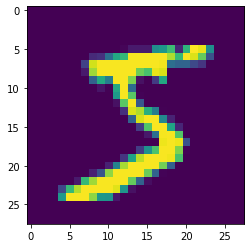

In [5]:
# plot the data to see what it looks like! 
# Reference: https://matplotlib.org/3.2.1/tutorials/introductory/images.html
plt.imshow(mnist_trainset.data[0])

In [6]:
mnist_trainset.targets[0]

tensor(5)

In [7]:
# show the numbers in the data, see how they are in the scale of 0-255.
mnist_trainset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [8]:
# now we want to normalize the data, Andrew Ng talked aobut why you should do it in his video
# if you forogt, would be great to check the reasoning again
# for image data, we typically rescale them to range (0,1)
# for other data, we typically rescale them to 0 mean and 1 std
# btw anyone knows why we divide by 255.0 and not 255?
X_train_normalized = X_train/255.0
X_test_normalized = X_test/255.0

In [9]:
X_train_normalized[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [10]:
# reshape each data point (28x28) into an array (784)
# because we haven't learned about conv nets.
# so now we will use a MLP, which cannot deal with 2-d data
# also separate into train and validation
n_train = int(len(mnist_trainset) * 0.9)
n_val = len(mnist_trainset) - n_train
n_test = len(mnist_testset)

X_train_normalized_flattened = X_train_normalized[0:n_train].reshape(n_train, -1)
X_val_normalized_flattened = X_train_normalized[n_train:].reshape(n_val, -1)
X_test_normalized_flattened = X_test_normalized.reshape(10000, -1)
X_train_normalized_flattened.shape, X_val_normalized_flattened.shape, X_test_normalized_flattened.shape
y_train = mnist_trainset.targets[0:n_train]
y_val = mnist_trainset.targets[n_train:]

In [11]:
# specify a model
class Net(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(input_dim, hidden_dim)  
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  
        self.fc3 = nn.Linear(hidden_dim, output_dim) 

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x


In [12]:
model = Net(784, 10, 64)

In [13]:
pred = model(X_train_normalized_flattened[0:1])
pred

tensor([[0.1049, 0.1064, 0.1075, 0.0772, 0.0958, 0.0908, 0.1118, 0.0993, 0.1081,
         0.0982]], grad_fn=<SoftmaxBackward>)

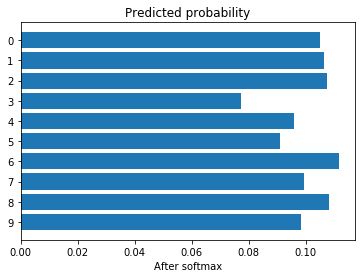

In [14]:
def show_pred(prediction_tensor):
    fig, ax = plt.subplots()
    # Example data
    number_classes = (0,1,2,3,4,5,6,7,8,9)
    y_pos = np.arange(len(number_classes))
    probs = prediction_tensor.detach().numpy()
    ax.barh(y_pos, probs, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(number_classes)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('After softmax')
    ax.set_title('Predicted probability')

    plt.show()
show_pred(pred[0])

In [15]:
def get_number_correct(pred, label):
    pred_number = torch.argmax(pred, dim=1)
    return (pred_number == label).long().sum()

In [16]:
model = Net(784, 10, 256)

In [17]:
# our mnist data is already shuffled, so don't worry about it but
# IF YOU DON'T KNOW THE DATA SET IS SHUFFLED OR NOT, ALWAYS REMEMBER TO SHUFFLE IT, or sample mini-batch randomly

# now for learning
# for different task we typically use different losses, for regression task we typically use MSE
# for classification we typically use cross entropy
criterion = nn.CrossEntropyLoss()
# most ML researcher would agree that Adam is the go-to option for optimizing.
# it's a little more complicated than SGD, and typically bring good performance.
# in practice, always use Adam, unless you know what you are doing 
optimizer = optim.Adam(model.parameters(), lr=0.001)
minibatch_size = 32
n_minibatch =int(n_train/minibatch_size)

n_epoch = 5
train_losses = np.zeros(n_epoch)
validation_losses = np.zeros(n_epoch)
train_accs = np.zeros(n_epoch)
val_accs = np.zeros(n_epoch)

for i in range(n_epoch):
    running_loss = 0
    correct_train = 0
    for i_minibatch in range(n_minibatch):
        # you can use pytorch utilities to get minibatch, you can also
        batch_start = i_minibatch * minibatch_size
        batch_end = (i_minibatch+1) * minibatch_size
        X_batch = X_train_normalized_flattened[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]
        pred = model(X_batch)
        loss = criterion(pred, y_batch)
        running_loss += loss.item()
        correct_train += get_number_correct(pred, y_batch)
        # update 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    running_loss /= n_minibatch
    pred_val = model(X_val_normalized_flattened)
    loss_val = criterion(pred_val, y_val)
    train_losses[i] = running_loss
    validation_losses[i] = loss_val.item()
    train_acc = correct_train/float(n_train)
    train_accs[i] = train_acc
    val_acc =  get_number_correct(pred_val, y_val)/float(n_val)
    val_accs[i] =val_acc
    print("epoch %d, train loss %.4f, train acc %.4f, val loss %.4f, val acc %.4f" % (i,running_loss, train_acc, loss_val.item(), val_acc))


epoch 0, train loss 1.5879, train acc 0.8797, val loss 1.5132, val acc 0.9492
epoch 1, train loss 1.5156, train acc 0.9466, val loss 1.5053, val acc 0.9567
epoch 2, train loss 1.5021, train acc 0.9595, val loss 1.4967, val acc 0.9657
epoch 3, train loss 1.4976, train acc 0.9635, val loss 1.4936, val acc 0.9672
epoch 4, train loss 1.4932, train acc 0.9677, val loss 1.4909, val acc 0.9700


In [18]:
pred_train = model(X_train_normalized_flattened)
wrong_entries = torch.argmax(pred_train, 1)  != y_train

In [19]:
wrong_entries.nonzero()

tensor([[   80],
        [  132],
        [  137],
        ...,
        [53911],
        [53996],
        [53999]])

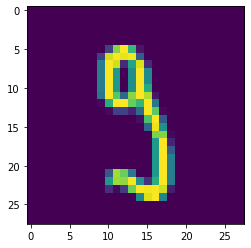

In [20]:
k = 48
plt.imshow(mnist_trainset.data[k])

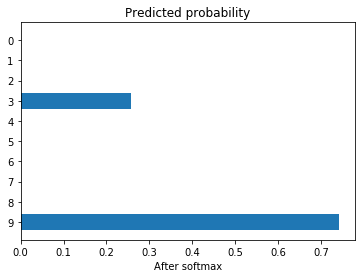

In [21]:
pred = model(X_train_normalized_flattened[k:k+1])
show_pred(pred[0])

In [22]:
# test loss after training
pred_test = model(X_test_normalized_flattened)
loss_test = criterion(pred_test, y_test)
test_acc = get_number_correct(pred_test, y_test)/float(n_test)
loss_test, test_acc

(tensor(1.4951, grad_fn=<NllLossBackward>), tensor(0.9664))